In [1]:
import pickle
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io as skio
from mpl_toolkits.axes_grid1 import ImageGrid

In [6]:
# Get L and ab values
trainingDataIn = []
for filename in os.listdir('./Images/L/'):
    tempfile = open('Images/L/'+filename, 'rb')
    lvalue = pickle.load(tempfile)
    trainingDataIn.append(lvalue)
    tempfile.close()
    # Converting to array
trainingDataIn = np.array(trainingDataIn)
trainingDataIn.shape


trainingDataOut = []
for filename in os.listdir('./Images/ab/'):
    tempfile = open('Images/ab/'+filename, 'rb')
    abvalue = pickle.load(tempfile)
    trainingDataOut.append(abvalue)
    tempfile.close()
    # Converting to array
trainingDataOut = np.array(trainingDataOut)
trainingDataOut.shape

(541, 400, 400)

(541, 400, 400, 2)

In [7]:
# Selecting shuffled index and seperating training and test data

shuffledindex = np.random.choice(range(0,len(trainingDataIn)),len(trainingDataIn),replace=False)
# start to 80% is training data
trainingindices = shuffledindex[:int(0.80*len(trainingDataIn))]
# 80% to end data is test data
testindices = shuffledindex[int(0.80*len(trainingDataIn)):]

In [22]:
# Train data
trainX = trainingDataIn[trainingindices].reshape((-1,400,400,1))
trainY = trainingDataOut[trainingindices].reshape((-1,400,400,2))
# Test data
testX = trainingDataIn[testindices].reshape((-1,400,400,1))
testY = trainingDataOut[testindices].reshape((-1,400,400,2))

In [23]:
trainX.shape
trainY.shape

testX.shape
testY.shape

(432, 400, 400, 1)

(432, 400, 400, 2)

(109, 400, 400, 1)

(109, 400, 400, 2)

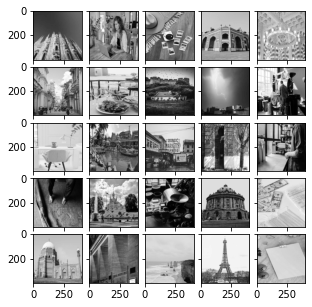

In [24]:
# Grayscale Input
# Getting images and sizing them
# Collecting images in a grid

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 5x5 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for i,ax in enumerate(grid):
    # Iterating over the grid returns the Axes.
    temp = ax.imshow(trainImagesX[i],cmap=plt.cm.gray)

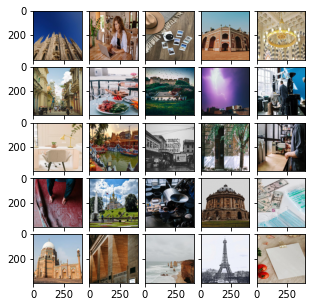

In [25]:
# RGB images for reference
# Getting images and sizing them
# Collecting images in a grid

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 5x5 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for i,ax in enumerate(grid):
    # Iterating over the grid returns the Axes.
    image = np.zeros((400,400,3))
    image[:,:,0] = trainImagesX[i,:,:,0]
    image[:,:,1:] = trainImagesY[i]*128
    temp = ax.imshow(lab2rgb(image))

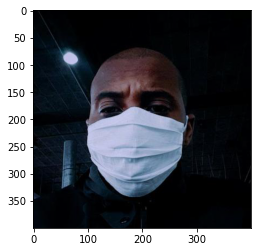

In [58]:
plt.imshow(lab2rgb(t))

In [45]:
"test.pckl".split(".")

['test', 'pckl']

In [16]:
# Building the neural network networkvalid
# Sequential model
model = Sequential()

# Size of image of gray scale will be 400*400
model.add(InputLayer(input_shape=(400, 400, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Upscaling to 400, after loss to 200
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

# Upscaling to 400, after loss to 200
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [17]:
model.compile(optimizer='adam',loss='mse',metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 256)     147712    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 400, 400, 256)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 400, 400, 128)     295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 400, 400, 128)     147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 400, 400, 128)     1

In [62]:
model.fit(x=trainX, 
    y=trainY,
    batch_size=10,
    epochs=20,callbacks=[callback],steps_per_epoch=5)

Epoch 1/20
5/5 [==============================] - 149s 30s/step - loss: 0.0131 - accuracy: 0.6367
Epoch 2/20
5/5 [==============================] - 151s 30s/step - loss: 0.0098 - accuracy: 0.6551
Epoch 3/20
5/5 [==============================] - 159s 32s/step - loss: 0.0138 - accuracy: 0.6157
Epoch 4/20
5/5 [==============================] - 153s 31s/step - loss: 0.0090 - accuracy: 0.5908
Epoch 5/20
5/5 [==============================] - 152s 30s/step - loss: 0.0092 - accuracy: 0.6056
Epoch 6/20
5/5 [==============================] - 156s 31s/step - loss: 0.0088 - accuracy: 0.5946
Epoch 7/20
5/5 [==============================] - 156s 31s/step - loss: 0.0087 - accuracy: 0.6232
Epoch 8/20
5/5 [==============================] - 152s 30s/step - loss: 0.0094 - accuracy: 0.6455
Epoch 9/20
5/5 [==============================] - 123s 25s/step - loss: 0.0074 - accuracy: 0.6061
Epoch 10/20
5/5 [==============================] - 154s 31s/step - loss: 0.0119 - accuracy: 0.5920
Epoch 11/20
5/5 [==

In [63]:
print(model.evaluate(testX, testY, batch_size=10))

11/11 [==============================] - 92s 8s/step - loss: 0.0123 - accuracy: 0.6005
[0.012321771122515202, 0.6005368232727051]


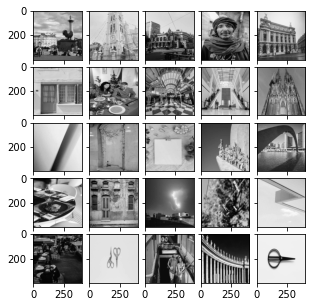

In [26]:
# Grayscale 
# Getting images and sizing them
# Collecting images in a grid

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 5x5 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for i,ax in enumerate(grid):
    # Iterating over the grid returns the Axes.
    temp = ax.imshow(testX[i],cmap=plt.cm.gray)

In [97]:
test = testX[0].reshape((1,400,400,1))

In [98]:
output = model.predict(test) 

In [99]:
output[0].shape

(400, 400, 2)

In [100]:
image = np.zeros((400,400,3))

In [101]:
image[:,:,0] = test[0,:,:,0]
image[:,:,1:] = output[0]*128

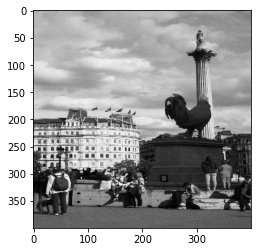

In [102]:
temp = plt.imshow(test[0],cmap = plt.cm.gray)

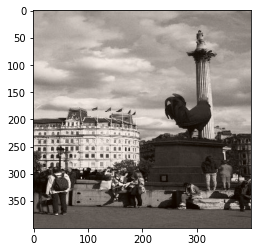

In [103]:
# Output image

temp = plt.imshow(lab2rgb(image))

In [104]:
image[:,:,0] = test[0,:,:,0]
image[:,:,1:] = testY[0]*128

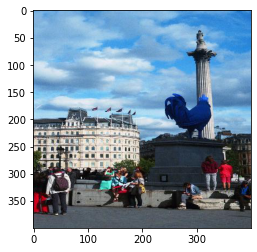

In [105]:
temp = plt.imshow(lab2rgb(image))